In [11]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook

In [12]:
import chardet

In [13]:
file3 = r'C:\Users\Administrator\Desktop\PPG_dataset\json\seven_epq.json'
file4 = r'C:\Users\Administrator\Desktop\PPG_dataset\json\eitht_epq.json'
excel = pd.read_excel(r'C:\Users\Administrator\Desktop\PPG_dataset\json\心理量表具体条目.xlsx', sheet_name='vitality')
selected_questions = excel[excel['维度'] == '内外向(E)']['题目'].to_list()
selected_questions.remove('你喜欢做一些需要快速动作的事情吗?')

In [14]:
with open(file3, 'r', encoding='utf-8-sig') as file:
    datas_seven = json.load(file)

with open(file4, 'r', encoding='utf-8-sig') as file:
    datas_eight = json.load(file)

def file_load(datas):

    columns = ['userId', 'userName', 'gender']
    question_ids = []
    all_rows = []
    question_name = []
    try:

        for idx, data in enumerate(datas):
            user_id = data['userId']
            user_name = data['userName']
            gender = data['gender']
            dimension = data['dimensions']
            # Initialize a list to store the selected options
            option_list = []
            for result in dimension:
                question = result['question']['title']
                question_id = result['question']['id']
                selected_option = result['selectedOption']['content']
                # Convert option to numerical values
                option_value = {'是': 1, '否': 0}.get(selected_option, None)
                option_list.append(option_value)
                if idx == 0:
                    #columns.append(question)
                    columns.append(question)
                    question_ids.append(question_id)
                    question_name.append(question)
            # Combine all user information and answers into a single row
            row = [user_id, user_name, gender] + option_list
            all_rows.append(row)
    except:
        for idx, data in enumerate(datas_eight):
            user_id = data['userId']
            user_name = data['userName']
            gender = data['gender']
            dimension = data['dimensions']
            # Initialize a list to store the selected options
            option_list = []
            for result in dimension:
                question_id = result['question']['title']
                selected_option = result['selectedOption']['content']
                # Convert option to numerical values
                option_value = {'是': 1, '否': 0}.get(selected_option, None)
                option_list.append(option_value)
                # Add question titles to columns (only on the first iteration)
                if idx == 0:
                    columns.append(question_id)
            # Combine all user information and answers into a single row
            row = [user_id, user_name, gender] + option_list
            all_rows.append(row)
        

    # Create DataFrame from the collected rows and set the columns
    df = pd.DataFrame(all_rows, columns=columns)
    question_name = pd.DataFrame({'ID':question_ids, 'Questions': question_name})
    return df, question_name


In [15]:
seven_class,question_name = file_load(datas_seven)
seven_class['age'] = len(seven_class)*[13]
eight_class,_ = file_load(datas_eight)
eight_class['age'] = len(eight_class)*[14]


middle_school_data = pd.concat([seven_class, eight_class])
middle_school_data['Total'] = middle_school_data.iloc[:,3:-1].sum(axis=1)
middle_school_data.dropna(inplace=True)


selected_columns = ['userId', 'userName', 'gender', 'age', 'Total'] + selected_questions
middle_school_data = middle_school_data[selected_columns]
middle_school_data['vitality_sum'] = middle_school_data.iloc[:,5:].sum(axis = 1)

In [16]:
middle_school_data['vitality_sum'].value_counts().sort_index()

vitality_sum
0.0      3
1.0      6
2.0      3
4.0      5
5.0      7
6.0     10
7.0     13
8.0     26
9.0     37
10.0    32
11.0    29
12.0    45
13.0    50
14.0    80
15.0    79
16.0    81
17.0    93
18.0    86
19.0    89
20.0    73
21.0    45
22.0    40
23.0    17
24.0    17
Name: count, dtype: int64

In [17]:
less_range = 10.0
greater_range = 20.0
print(f"Count of Subjects less than {less_range}: ",middle_school_data[middle_school_data['vitality_sum'] < less_range]['vitality_sum'].count())
print(f"Count of Subjects Greater than {greater_range}: ",middle_school_data[middle_school_data['vitality_sum'] > greater_range]['vitality_sum'].count())

Count of Subjects less than 10.0:  110
Count of Subjects Greater than 20.0:  119


<Axes: xlabel='vitality_sum', ylabel='Count'>

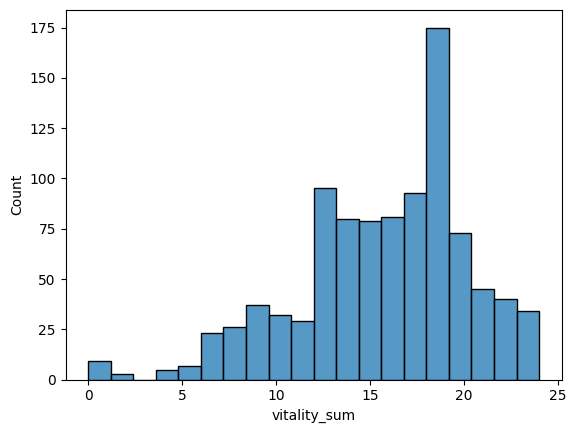

In [18]:
sns.histplot(middle_school_data['vitality_sum'])

<Axes: xlabel='vitality_sum', ylabel='Density'>

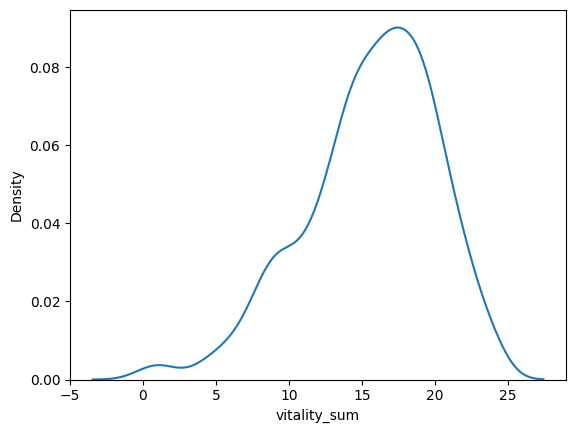

In [19]:
sns.kdeplot(middle_school_data['vitality_sum'])

In [20]:
middle_school_data.to_excel("middle_school_data_vitality.xlsx", index= False)